# 9장 그림 및 예제 코드

In [1]:
# 기본적인 import들
# 이후 그래프 그리는 코드에는 중복으로 적지 않음.
# 다른 곳으로 그래프 그리는 코드를 복사-붙이기 할 때는 
# 이 import 코드와 함께 복사-붙이기 해야함
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits import mplot3d
import matplotlib.font_manager as mfm
import sympy

# numpy 출력 형식 지정
np.set_printoptions(precision=4, linewidth=150)

# matplotlib 스타일 지정
mpl.style.use('bmh')
mpl.style.use('seaborn-whitegrid')
style = plt.style.library['bmh']

# 그림을 로컬 폴더에 저장하고 싶으면 True로 수정 
file_print = False

In [2]:
def plot_boundary(X, model, ax):
    # meshgrid를 짜서 Model에 포워드 시키기
    # 뉴럴 네트웍 모델 자체가 함수이므로 (x,y)->z를 하는 것이다.
    x = np.linspace(min(X[:,0]), max(X[:,0]))
    y = np.linspace(min(X[:,1]), max(X[:,1]))
    
    xx, yy = np.meshgrid(x, y)
    grid_tensor = torch.Tensor(np.c_[xx.flatten(), yy.flatten()])
    zz = model.forward(grid_tensor).detach().numpy().reshape(xx.shape)
    ax.contour(xx, yy, zz, cmap='gray', levels=[0.5])

def logistic(x):
    return 1 / (1+np.exp(-x))



## 샘플데이터 만들기

### 결정 경계

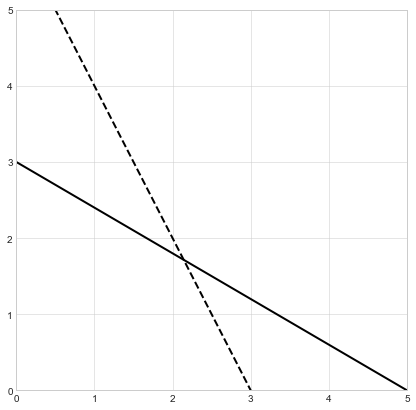

In [3]:
dcs_bnd_1 = lambda x: -(3/5)*x + 3
dcs_bnd_1_imp = lambda x, y: (3)*x + (5)*y + (-15)

dcs_bnd_2 = lambda x: -2*x + 6
dcs_bnd_2_imp = lambda x, y: (-6)*x + (-3)*y + (18)

x = np.linspace(0, 5, 50)

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(1, 1, 1)

ax.plot(x, dcs_bnd_1(x), color='k')
ax.plot(x, dcs_bnd_2(x), '--', color='k')

ax.set_xlim(0, 5)
ax.set_ylim(0, 5)

plt.show()

### 무작위점 500개 생성

In [4]:
np.random.seed(3)

# 0~5에서 무작위 점 500개 추출
N = 500
samples = (np.random.rand(N*2)*5).reshape(N,2)

In [5]:
samples.shape

(500, 2)

### 생성된 점 500개 그리기

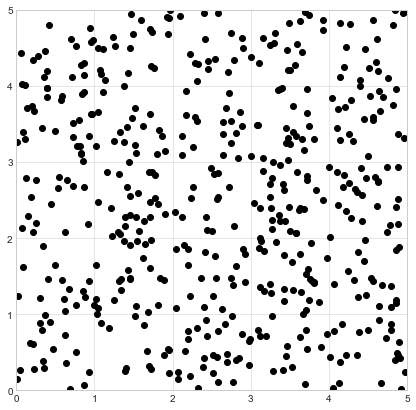

In [6]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(1, 1, 1)

ax.plot(samples[:,0], samples[:,1], 'o', color='k')
ax.set_ylim(0, 5)
ax.set_xlim(0, 5)

plt.show()

## 샘플 데이터에 대한 레이블(타겟) 만들기

In [7]:
y1_bin = dcs_bnd_1_imp(samples[:,0], samples[:,1]) > 0
y2_bin = dcs_bnd_2_imp(samples[:,0], samples[:,1]) < 0

In [8]:
positive_where = np.where((y1_bin | y2_bin))[0]
target = np.zeros(N)
target[positive_where] = 1

print(target.shape)

(500,)


- 이제 다음처럼 데이터가 준비되었음

- `samples`: 점 500개게 (500, 2) 형태로 저장

- `target`: 각점에 대한 레이블 0, 1이 (500,) 형태로 저장

## 그림 9-1

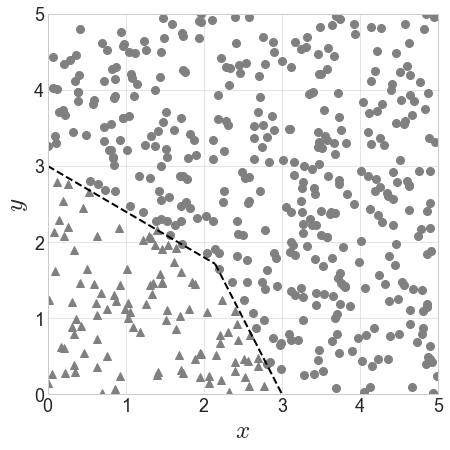

In [9]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(1, 1, 1)

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_xlabel('$x$', fontsize=25)
ax.set_ylabel('$y$', fontsize=25)

ax.plot(samples[np.where(target==1)[0],0], samples[np.where(target==1)[0],1], 'o', 
        markerfacecolor='gray', markeredgecolor='gray', markersize=8)
ax.plot(samples[np.where(target==0)[0],0], samples[np.where(target==0)[0],1], '^', 
        markerfacecolor='gray', markeredgecolor='gray', markersize=8)

x1 = np.linspace(0, 15/7, 50)
x2 = np.linspace(15/7, 3, 50)

ax.plot(x1, dcs_bnd_1(x1), '--', color='k')
ax.plot(x2, dcs_bnd_2(x2), '--', color='k')

ax.set_ylim(0,5)
ax.set_xlim(0,5)

if file_print == True :
    fig.savefig("imgs/chap9/fig9-1.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap9/fig9-1.pdf", format='pdf', bbox_inches='tight')
    
plt.show()

## 그림 9-3: $ 3x + 5y - 15 = 0 $ 로 분류

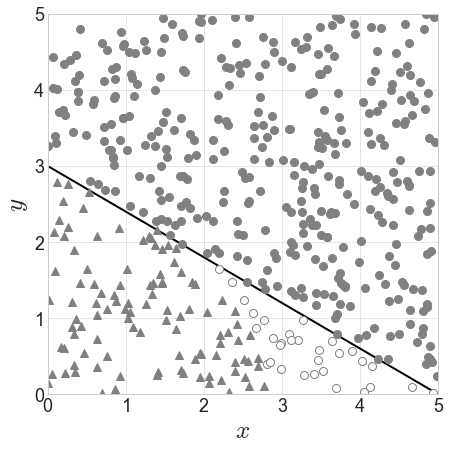

In [10]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(1, 1, 1)

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_xlabel('$x$', fontsize=25)
ax.set_ylabel('$y$', fontsize=25)

ax.plot(x, dcs_bnd_1(x), color='k')

ax.plot(samples[y1_bin, 0], samples[y1_bin,1], 'o', 
        markerfacecolor='gray', markeredgecolor='gray', markersize=8)

not_y1_bin = np.invert(y1_bin)
not_y1_and_target = np.logical_and(not_y1_bin,target)

ax.plot(samples[not_y1_and_target, 0], samples[not_y1_and_target, 1], 'o',
        markerfacecolor='white', markeredgecolor='gray', markersize=8)

ax.plot(samples[np.where(target==0)[0], 0], samples[np.where(target==0)[0], 1], '^', 
        markerfacecolor='gray', markeredgecolor='gray', markersize=8)

ax.set_ylim(0,5)
ax.set_xlim(0,5)

if file_print == True :
    fig.savefig("imgs/chap9/fig9-3.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap9/fig9-3.pdf", format='pdf', bbox_inches='tight')
    
plt.show()

## 그림 9-5: $ -6x - 3y + 18 = 0 $로 분류

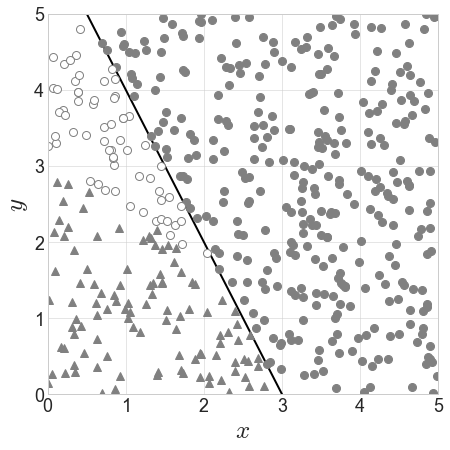

In [11]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,1,1)

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_xlabel('$x$', fontsize=25)
ax.set_ylabel('$y$', fontsize=25)

ax.plot(x, dcs_bnd_2(x), color='k')

ax.plot(samples[y2_bin, 0], samples[y2_bin, 1], 'o', 
        markerfacecolor='gray', markeredgecolor='gray', markersize=8)

not_y2_bin = np.invert(y2_bin)
not_y2_and_target = np.logical_and(not_y2_bin,target)

ax.plot(samples[not_y2_and_target, 0], samples[not_y2_and_target, 1], 'o',
        markerfacecolor='white', markeredgecolor='gray', markersize=8)

ax.plot(samples[np.where(target==0)[0], 0], samples[np.where(target==0)[0], 1], '^', 
        markerfacecolor='gray', markeredgecolor='gray', markersize=8)

ax.set_ylim(0,5)
ax.set_xlim(0,5)

if file_print == True :
    fig.savefig("imgs/chap9/fig9-5.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap9/fig9-5.pdf", format='pdf', bbox_inches='tight')

plt.show()

## 그림 9-8: 위 두 경우를 합성하여 분류하는 경우

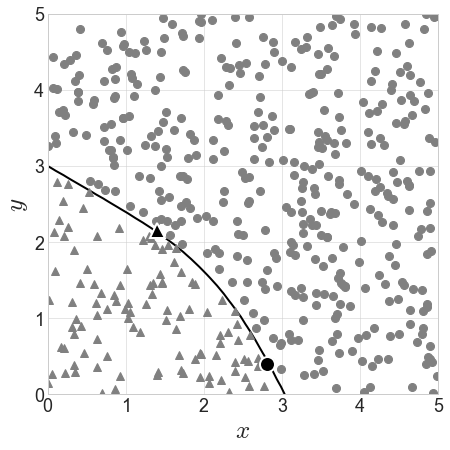

In [12]:
xx, yy = np.meshgrid(x, x)

a, b, c = 10, -9, 4
o = lambda x, y: logistic( a*logistic(dcs_bnd_1_imp(x, y)) + b*logistic(dcs_bnd_2_imp(x, y)) + c )

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot()

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_xlabel('$x$', fontsize=25)
ax.set_ylabel('$y$', fontsize=25)

pred = o(samples[:,0], samples[:,1])
pred_pos = pred >= 0.5
pred_neg = pred < 0.5

ax.contour(xx, yy, o(xx,yy), cmap='gray', levels=[0.5])

# for positive samples
TP = np.logical_and(target==1, pred_pos)
FN = np.logical_and(target==1, pred_neg)

# for negative samples
TN = np.logical_and(target==0, pred_neg)
FP = np.logical_and(target==0, pred_pos)

ax.plot(samples[TP,0], samples[TP,1], 'o', 
        markerfacecolor='gray', markeredgecolor='gray', markersize=8)
ax.plot(samples[TN,0], samples[TN,1], '^', 
        markerfacecolor='gray', markeredgecolor='gray', markersize=8)

ax.plot(samples[FN,0], samples[FN,1], 'o', 
        markerfacecolor='k', markeredgecolor='w', markeredgewidth=2, markersize=15)
ax.plot(samples[FP,0], samples[FP,1], '^', 
         markerfacecolor='k', markeredgecolor='w', markeredgewidth=2, markersize=15)

ax.set_ylim(0,5)
ax.set_xlim(0,5)


if file_print == True :
    fig.savefig("imgs/chap9/fig9-8.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap9/fig9-8.pdf", format='pdf', bbox_inches='tight')
    
plt.show()

## 그림 9-9

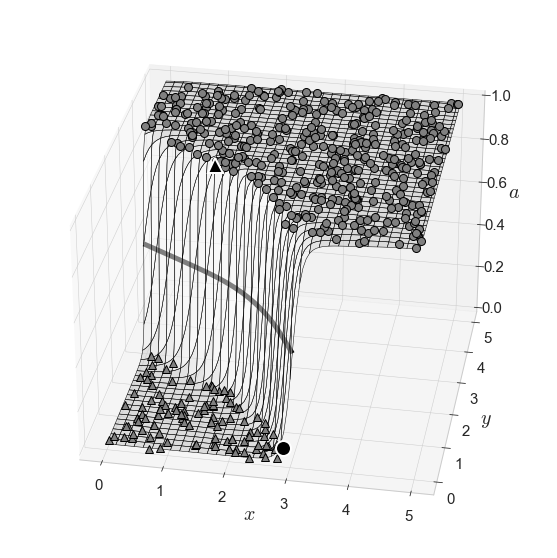

In [13]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)

x1 = np.linspace(0, 5, 101)
x2 = np.linspace(0, 5, 101)

X1, X2 = np.meshgrid(x1, x2)

ax.contour(X1, X2, o(X1, X2), linewidths=5, cmap='gray', levels=[0.5])
ax.plot_surface(X1, X2, o(X1, X2), color='w', edgecolor='k', alpha=0.5)

ax.plot3D(samples[TP,0], samples[TP,1], 1.0, 'o', 
        markerfacecolor='gray', markeredgecolor='k', markersize=8, zorder=10)

ax.plot3D(samples[TN,0], samples[TN,1], 0.0, '^', 
        markerfacecolor='gray', markeredgecolor='k', markersize=8, zorder=10)

ax.plot3D(samples[FN,0], samples[FN,1], 0.0, 'o', 
        markerfacecolor='k', markeredgecolor='w', markeredgewidth=2, markersize=15, zorder=10)
ax.plot3D(samples[FP,0], samples[FP,1], 1.0, '^', 
        markerfacecolor='k', markeredgecolor='w', markeredgewidth=2, markersize=15, zorder=10)

ax.xaxis.set_tick_params(labelsize=15) 
ax.yaxis.set_tick_params(labelsize=15)
ax.zaxis.set_tick_params(labelsize=15)
ax.set_xlabel(r'$x$', fontsize=20)
ax.set_ylabel(r'$y$', fontsize=20)
ax.set_zlabel(r'$a$', fontsize=20)
ax.view_init(30, -80)

if file_print == True :
    fig.savefig("imgs/chap10/fig10-9.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap10/fig10-9.pdf", format='pdf', bbox_inches='tight')
    
plt.show()

## network 함수

In [14]:
def network(X, W):
    """
    X : (N, D)
    W : (3, 3)
        [b^(1)_1, w^(1)_11, w^(1)_12]
        [b^(1)_2, w^(1)_21, w^(1)_22]
        [b^(2)_1, w^(2)_11, w^(2)_12]
    
    ret : (N,)
    
    D, H, A = 2, 2, 1
    """
    X = np.hstack( (np.ones(X.shape[0]).reshape(-1,1), X) ) # (N,D)->(N,D+1)
    Z1 = np.dot(W[:2,:], X.T) # (H,N)=(H,D+1)*(D+1,N)
    A1 = logistic(Z1)           # (H,N)
    A1 = np.vstack((np.ones(A1.shape[1]), A1)) # (H,N)->(H+1,N)
    Z = np.dot(W[-1,:], A1) # (H+1,)*(H+1,N)
    A2 = logistic(Z)         # (N,)
    
    return A2

## network 함수 검증

In [15]:
W = np.array([ [-15, 3, 5], [18, -6, -3], [4, 10, -9] ])
pred = network(samples, W)

pred[pred>=0.5] = 1
pred[pred<0.5] = 0

result = pred==target

np.size(result) - np.count_nonzero(result)

2

In [16]:
np.random.seed(17)
W = np.random.randn(9)

W.reshape(3,3)

array([[ 0.2763, -1.8546,  0.6239],
       [ 1.1453,  1.0372,  1.8866],
       [-0.1117, -0.3621,  0.1487]])

In [17]:
pred = network(samples, W.reshape(3,3))

pred[pred>=0.5] = 1
pred[pred<0.5] = 0

result = pred==target

np.size(result) - np.count_nonzero(result)

163

In [18]:
def J(W, X, T):
    """
    W: 함숫값을 결정하는 변수, 가중치 (9,)
    X: 주어진 점 데이터 X, X: (N,D)
    T: 데이터에 대한 클래스 T, 0 또는 1, T: (N,)
    """
    N = X.shape[0]
    W = W.reshape(3,3)
    
    Y = network(X, W)
    return (1/(2*N)) * ((T-Y)**2).sum()
    


In [19]:
# 초기 상태에서 목적함숫값
J(W, samples, target)

0.1263148192185165

In [20]:
from scipy import optimize

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin_cg.html
W_star = optimize.fmin_cg(J, W, args=(samples, target),  gtol=1e-06)

Optimization terminated successfully.
         Current function value: 0.000009
         Iterations: 334
         Function evaluations: 13110
         Gradient evaluations: 1311


In [21]:
W_star = W_star.reshape(3,3)
W_star

array([[ 41.7818,  -9.2112, -13.3681],
       [-24.8221,   8.6453,   2.8787],
       [ 16.3895, -36.4464,  35.808 ]])

## 그림 9-12

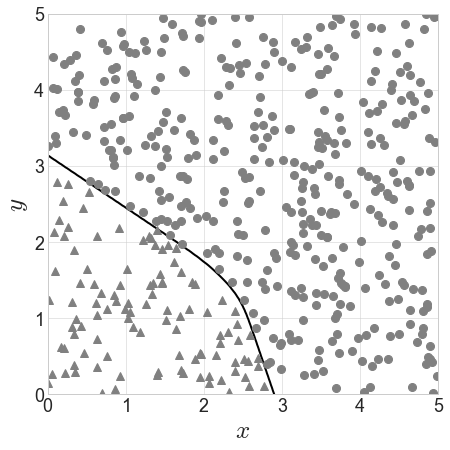

In [22]:
x = np.linspace(0, 5, 200)

xx, yy = np.meshgrid(x, x)

dcs_bnd_1_imp_ = lambda x, y: W_star[0, 1]*x + W_star[0, 2]*y + W_star[0, 0] 
dcs_bnd_2_imp_ = lambda x, y: W_star[1, 1]*x + W_star[1, 2]*y + W_star[1, 0] 

a, b, c = W_star[2, 1], W_star[2, 2], W_star[2, 0] 
o = lambda x, y: logistic( a*logistic(dcs_bnd_1_imp_(x, y)) + b*logistic(dcs_bnd_2_imp_(x, y)) + c )

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot()

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_xlabel('$x$', fontsize=25)
ax.set_ylabel('$y$', fontsize=25)

pred = o(samples[:,0], samples[:,1])
pred_pos = pred >= 0.5
pred_neg = pred < 0.5

ax.contour(xx, yy, o(xx,yy), cmap='gray', levels=[0.5])

# for positive samples
TP = np.logical_and(target==1, pred_pos)
FN = np.logical_and(target==1, pred_neg)

# for negative samples
TN = np.logical_and(target==0, pred_neg)
FP = np.logical_and(target==0, pred_pos)

ax.plot(samples[TP,0], samples[TP,1], 'o', 
        markerfacecolor='gray', markeredgecolor='gray', markersize=8)
ax.plot(samples[TN,0], samples[TN,1], '^', 
        markerfacecolor='gray', markeredgecolor='gray', markersize=8)

ax.plot(samples[FN,0], samples[FN,1], 'o', 
        markerfacecolor='k', markeredgecolor='w', markeredgewidth=2, markersize=15)
ax.plot(samples[FP,0], samples[FP,1], '^', 
        markerfacecolor='k', markeredgecolor='w', markeredgewidth=2, markersize=15)

ax.set_ylim(0,5)
ax.set_xlim(0,5)

if file_print == True :
    fig.savefig("imgs/chap9/fig9-12.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap9/fig9-12.pdf", format='pdf', bbox_inches='tight')
   
plt.show()